In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.cm import YlOrBr
%matplotlib inline

import xarray

# Elevation Data

NOTE: Made two versions just to experiment

In [2]:
path_elevation =  r"../Data/elevation_data/gimpdem_1km_compressed.tif"
data_elevation = xarray.open_dataarray(path_elevation)

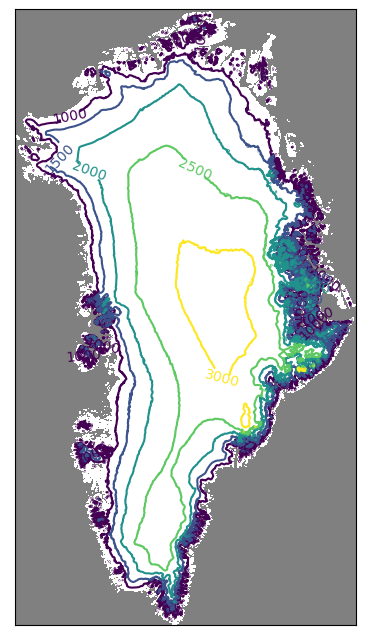

In [55]:
fig = plt.figure(figsize=(10, 8))

c = plt.contour(data_elevation.x, data_elevation.y, data_elevation[0], cmap="viridis",
            levels = list(range(1000, 3001, 500)))
cf = plt.contourf(data_elevation.x, data_elevation.y, data_elevation[0], colors="white", extend='min')
cf.cmap.set_under('gray')
cf.changed()
plt.clabel(c, c.levels, inline=True, fontsize=10)

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

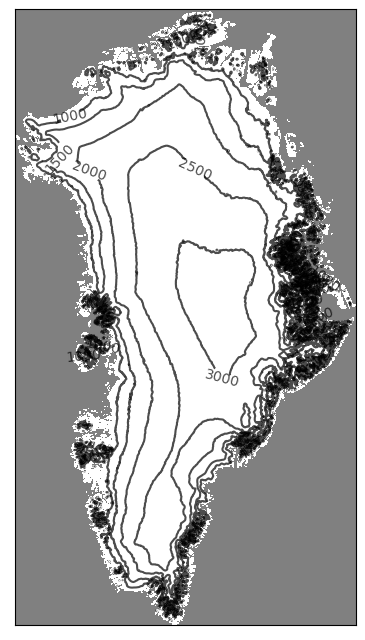

In [43]:
fig = plt.figure(figsize=(10, 8))

c = plt.contour(data_elevation.x, data_elevation.y, data_elevation[0], colors="black", alpha=0.7,
            levels = list(range(1000, 3001, 500)))
cf = plt.contourf(data_elevation.x, data_elevation.y, data_elevation[0], colors="white", extend='min')
cf.cmap.set_under('gray')
cf.changed()
plt.clabel(c, c.levels, inline=True, fontsize=10)

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# Prediction Results

In [14]:
path_dtr_15 =  r"../Data/results/regression/decision_tree/dtr_2019-07-15.tif"
path_lr_15 =  r"../Data/results/regression/linear_regression/lr_2019-07-15.tif"
path_dtc_15 = r"../Data/results/classification/decision_tree_classifier/dtc_multiclass_2019-07-15.tif"
path_logr_15 = r"../Data/results/classification/logistic_regression/logr_multiclass_2019-07-15.tif"

data_dtr_15 = xarray.open_dataarray(path_dtr_15)
data_lr_15 = xarray.open_dataarray(path_lr_15)
data_dtc_15 = xarray.open_dataarray(path_dtc_15)
data_logr_15 = xarray.open_dataarray(path_logr_15)

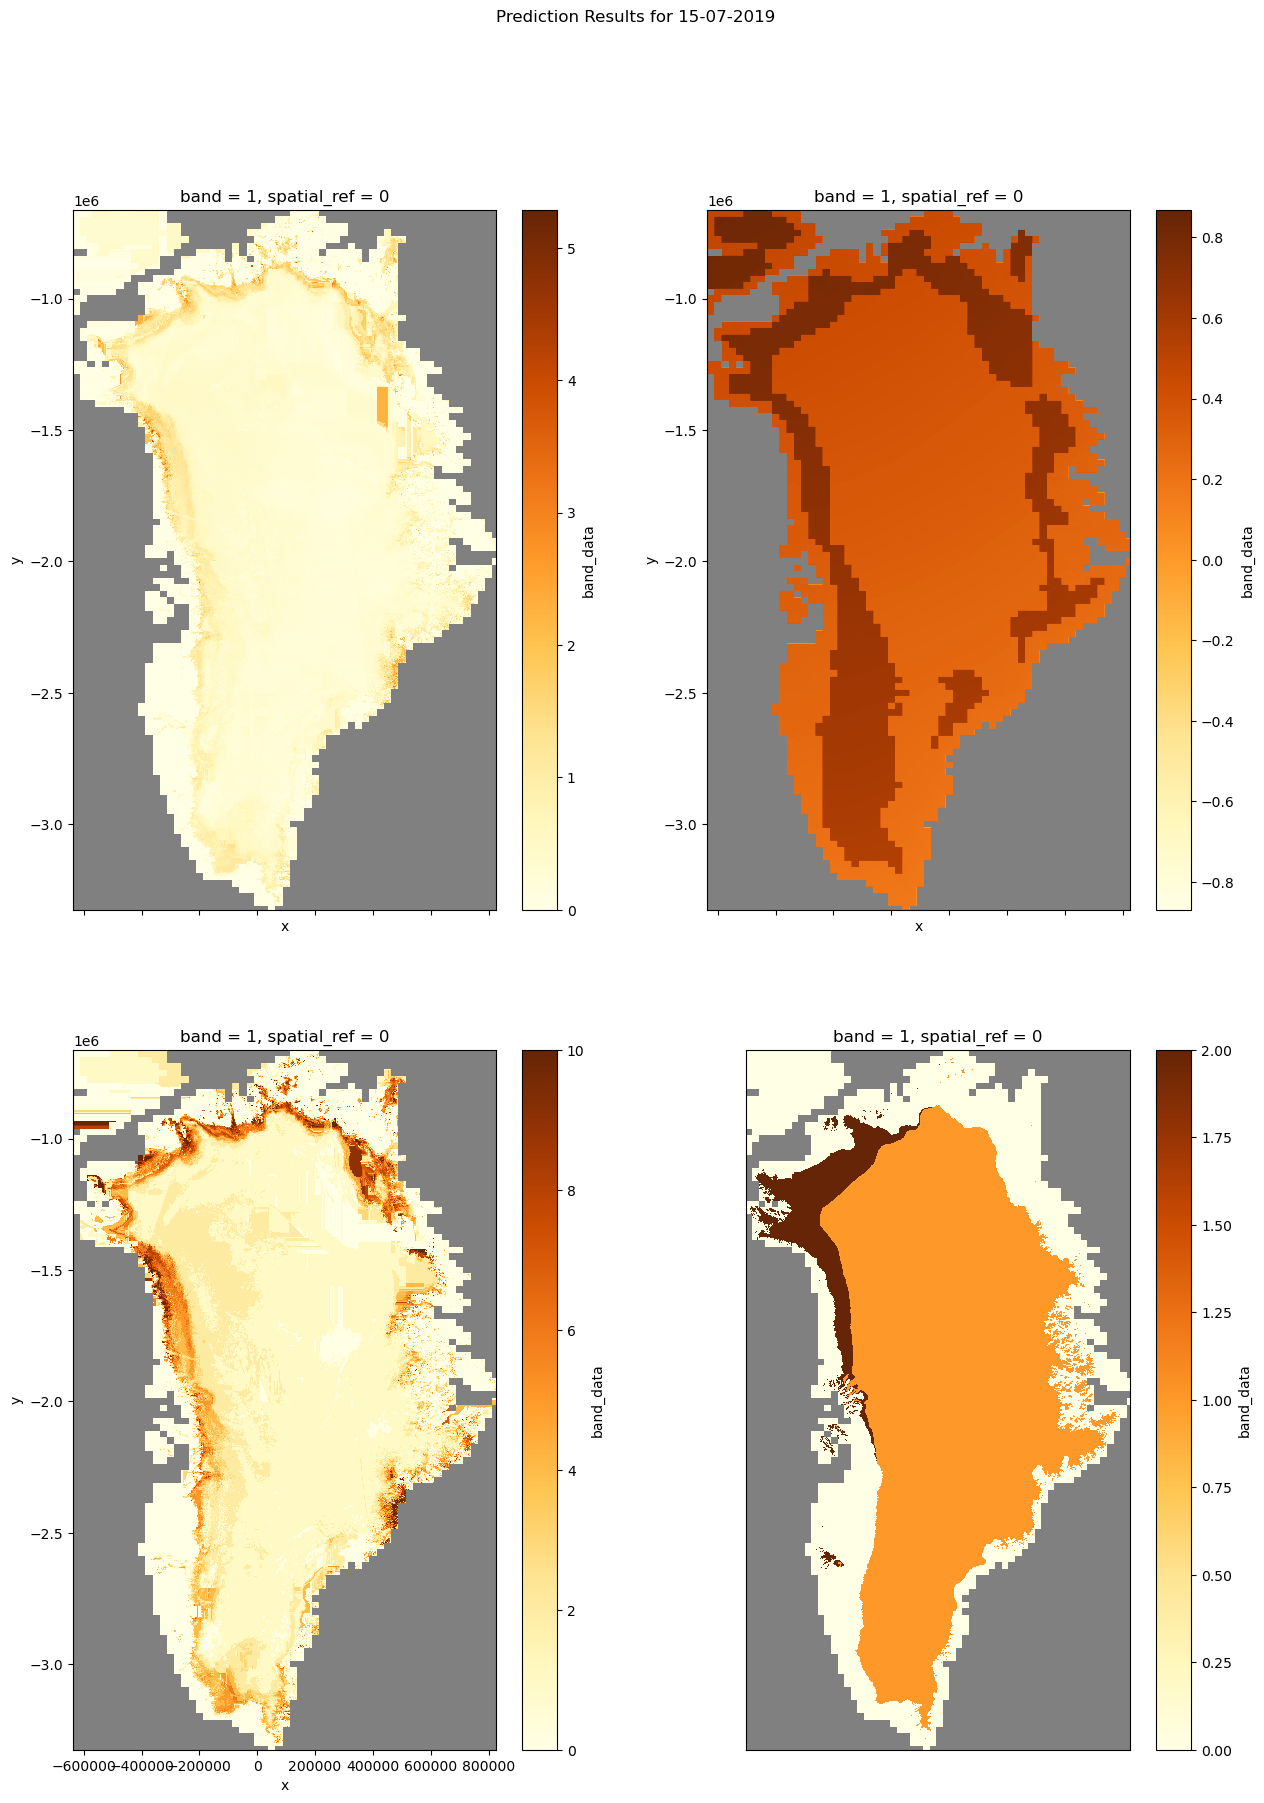

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 20))
fig.suptitle('Prediction Results for 15-07-2019')

masked_array = np.ma.array (data_dtr_15, mask=np.isnan(data_dtr_15))
cmap = YlOrBr
cmap.set_bad('gray',1.)

# Decision Tree Regression for 15.07.2019
axs[0, 0].set_title("Decision Tree Regressor")
p = data_dtr_15.plot(cmap=cmap, label="Snow Optical Grain Diameter (mm)", ax=axs[0, 0])   # set max of colorbar = 3 to make melting more clear as most values are below 3 

# Linear Regression for 15.07.2019
axs[0, 1].set_title("Linear Regressor")
p = data_lr_15.plot(cmap=cmap, label="Snow Optical Grain Diameter (mm)", ax=axs[0, 1])   # set max of colorbar = 3 to make melting more clear as most values are below 3 

# Decision Tree Classifier for 15.07.2019
axs[1, 0].set_title("Decision Tree Classifier")
p = data_dtc_15.plot(cmap=cmap, label="Snow Optical Grain Diameter (mm)", ax=axs[1, 0])   # set max of colorbar = 3 to make melting more clear as most values are below 3 

# Logistic Regression for 15.07.2019
axs[1, 1].set_title("Logistic Regression")
p = data_logr_15.plot(cmap=cmap, label="Snow Optical Grain Diameter (mm)", ax=axs[1, 1])   # set max of colorbar = 3 to make melting more clear as most values are below 3 


frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# Elavation Data + Prediction Data + Microwave Grid

TODO:
- Figure out how to remove elevation data for coastal region (see black fuzzy wuzzy at central east) --> maybe asking Baptiste because he managed for his plots
- Optimize hatch
- Optimize vmax
- Make coastal region gray

NOTE: Check https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html for hatches documentation

In [77]:
data_pred_path = "test_prediction_out2.tif"
data_pred = xarray.open_dataarray(data_pred_path)

In [78]:
path_elevation =  r"../Data/elevation_data/gimpdem_1km_compressed.tif"
data_elevation = xarray.open_dataarray(path_elevation)

data_elevation = data_elevation.where(data_elevation.x <= data_pred.x.max(), drop=True)     # crop to the same extent (x)
data_elevation = data_elevation.where(data_elevation.y >= data_pred.y.min(), drop=True)     # crop to the same extent (y)

In [79]:
data_mw_path = "../Data/microwave-rs/mw_interpolated/2019-07-01_mw.tif"
data_mw = xarray.open_dataarray(data_mw_path)
data_mw = data_mw.where(data_mw == 1, drop=True)

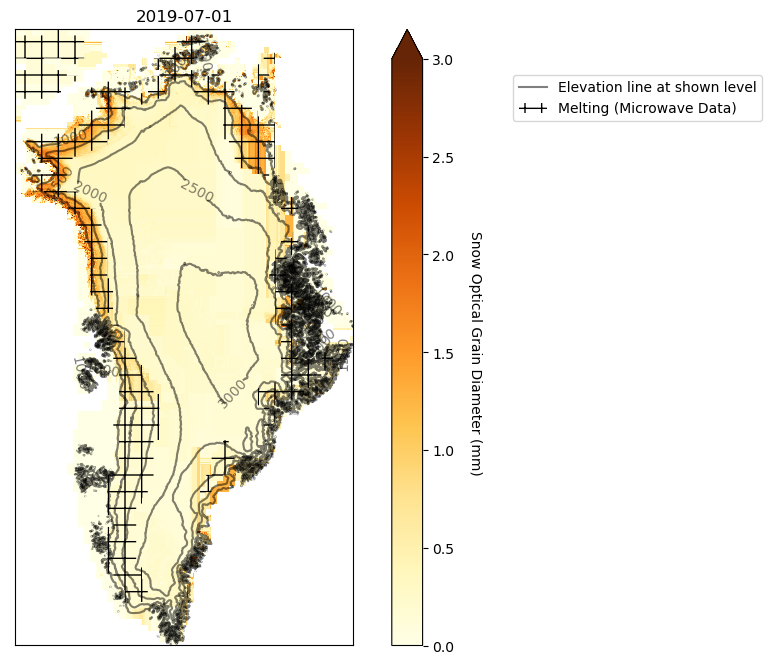

In [244]:
fig = plt.figure(figsize = (10, 8))


# Prediction Data
p = data_pred.plot(cmap="YlOrBr", vmax=3, label="Snow Optical Grain Diameter (mm)")   # set max of colorbar = 3 to make melting more clear as most values are below 3 
axs = plt.gcf().get_axes()
axs[0].set_title("2019-07-01")
axs[1].set_ylabel("Snow Optical Grain Diameter (mm)", rotation=270, labelpad=20)

# ELevation Data
e = plt.contour(data_elevation.x, data_elevation.y, data_elevation[0] , colors="black", alpha=0.5,
            levels = list(range(1000, 3001, 500)))
plt.clabel(e, e.levels, inline=True, fontsize=10)

# Microwave Data
m = plt.contourf(data_mw.x, data_mw.y, data_mw[0], hatches=["+"], alpha=0)

# mpatches.Patch(facecolor="black",alpha=0,hatch="++")
proxy = [plt.Line2D([0,1], [0,1], color="black", alpha=0.5), plt.Rectangle((0,1), 1, 1, facecolor="white", alpha=0, hatch="+")]
plt.legend(proxy, ["Elevation line at shown level", "Melting (Microwave Data)"], loc="lower right", bbox_to_anchor=(2.23,0.84))

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)